###### **Data Exploration**

In [2]:
# load and summarize the dataset

from pandas import read_csv
from collections import Counter

# define the dataset location
filename = './data/glass.csv'

# load the csv file as a data frame
dataframe = read_csv(filename, header=None)

# summarize the shape of the dataset
print("shape of the dataset: ", dataframe.shape)

# summarize the class distribution
print("###"*10)
print("class distribution: ")
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

shape of the dataset:  (214, 10)
##############################
class distribution: 
Class=1, Count=70, Percentage=32.710%
Class=2, Count=76, Percentage=35.514%
Class=3, Count=17, Percentage=7.944%
Class=5, Count=13, Percentage=6.075%
Class=6, Count=9, Percentage=4.206%
Class=7, Count=29, Percentage=13.551%


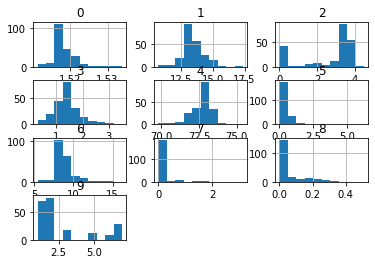

In [3]:
# create histograms of all variables

from pandas import read_csv
from matplotlib import pyplot

# define the dataset location
filename = './data/glass.csv'

# load the csv file as a data frame
df = read_csv(filename, header=None)

# create a histogram plot of each variable
df.hist()

# show the plot
pyplot.show()

###### **Model Test and Baseline Result**

In [4]:
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define the location of the dataset
full_path = './data/glass.csv'

# load the dataset
X, y = load_dataset(full_path)

# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

# define the reference model
model = DummyClassifier(strategy='most_frequent')

# evaluate the model
scores = evaluate_model(X, y, model)

# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

(214, 9) (214,) Counter({1: 76, 0: 70, 5: 29, 2: 17, 3: 13, 4: 9})
Mean Accuracy: 0.355 (0.009)


###### **Evaluate Machine Learning Algorithms**

>SVM 0.662 (0.057)
>KNN 0.651 (0.074)
>BAG 0.779 (0.055)
>RF 0.805 (0.057)
>ET 0.791 (0.041)


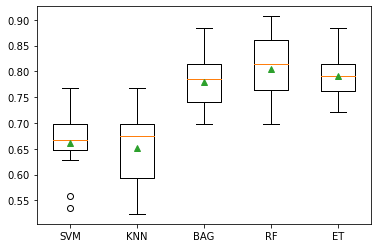

In [5]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define models to test
def get_models():
    models, names = list(), list()
    # SVM
    models.append(SVC(gamma='auto'))
    names.append('SVM')
    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    return models, names
 
# define the location of the dataset
full_path = './data/glass.csv'

# load the dataset
X, y = load_dataset(full_path)

# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###### **Cost-Sensitive Random Forest**

In [6]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable
    y = LabelEncoder().fit_transform(y)
    return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define the location of the dataset
full_path = './data/glass.csv'

# load the dataset
X, y = load_dataset(full_path)

# define the model
weights = {0:1.0, 1:1.0, 2:2.0, 3:2.0, 4:2.0, 5:2.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)

# evaluate the model
scores = evaluate_model(X, y, model)

# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.797 (0.056)


###### **Make Predictions on New Data**

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y
 
# define the location of the dataset
full_path = './data/glass.csv'
# load the dataset
X, y = load_dataset(full_path)
# define model to evaluate
model = RandomForestClassifier(n_estimators=1000)
# fit the model
model.fit(X, y)
# known class 0 (class=1 in the dataset)
row = [1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00]
print('>Predicted=%d (expected 0)' % (model.predict([row])))
# known class 1 (class=2 in the dataset)
row = [1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12]
print('>Predicted=%d (expected 1)' % (model.predict([row])))
# known class 2 (class=3 in the dataset)
row = [1.51769,13.65,3.66,1.11,72.77,0.11,8.60,0.00,0.00]
print('>Predicted=%d (expected 2)' % (model.predict([row])))
# known class 3 (class=5 in the dataset)
row = [1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00]
print('>Predicted=%d (expected 3)' % (model.predict([row])))
# known class 4 (class=6 in the dataset)
row = [1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00]
print('>Predicted=%d (expected 4)' % (model.predict([row])))
# known class 5 (class=7 in the dataset)
row = [1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01]
print('>Predicted=%d (expected 5)' % (model.predict([row])))